Libraries:


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
sns.set_theme()

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
import random

Loading dataset:

In [2]:
iris = pd.read_csv('./iris.csv')
iris = iris[iris.variety != 'Virginica']

In [3]:
iris.variety.unique()

array(['Setosa', 'Versicolor'], dtype=object)

cleaning dataset:

<AxesSubplot: xlabel='sepal.length', ylabel='sepal.width'>

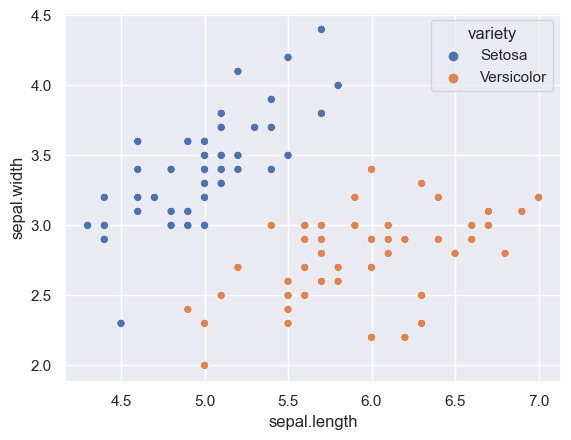

In [4]:
sns.scatterplot(data=iris, x="sepal.length", y="sepal.width", hue="variety")

prepaire target to model

In [5]:
x = (np.array([iris['sepal.length'],iris['sepal.width']])).T
y = (np.array([iris['variety']])).T
for i,j in enumerate(y):
    if j == 'Versicolor':
        y[i] = 1
    else:
        y[i] = -1

In [13]:
def perceptron(x,y,I=100000):
    w=np.zeros(3)
    
    # forward
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for j in range(I):
        i = j%x.shape[0]
        # check true classify
        if(y[i] != f(x[i,:])): 
            w[0] += y[i] 
            w[1] += y[i]*x[i,0]
            w[2] += y[i]*x[i,1]
            
    return w

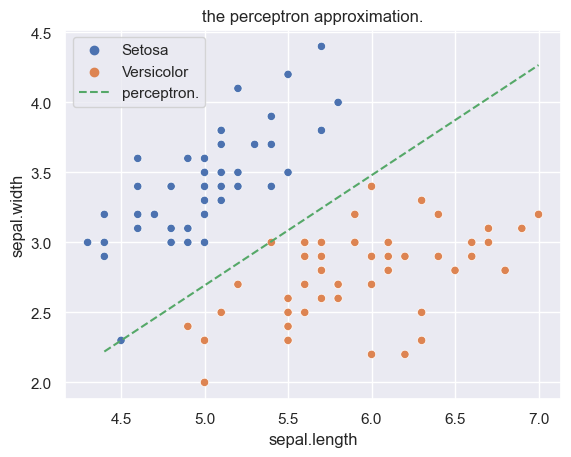

In [18]:
w = perceptron(x,y)

# line y=a*x+b
b = -w[0]/w[2]
a = -w[1]/w[2]

# plot line
x_line = np.linspace(max(x[:,1]),max(x[:,0]))
y_line = lambda x: a * x + b

# plot data
sns.scatterplot(data=iris, x="sepal.length", y="sepal.width", hue="variety")
pl.plot(x_line,y_line(x_line),'g--',label='perceptron.')

pl.legend()
pl.title('the perceptron approximation.');

In [19]:
a

0.7869822485207414

In [20]:
b

-1.2426035502958825